<a href="https://colab.research.google.com/github/menna03/Airbnb-New-User-Bookings/blob/main/Airbnb_New_User_Bookings_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from matplotlib.ticker import PercentFormatter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Define file paths
file_paths = [
    '/content/drive/MyDrive/Airbnb New User Bookings/age_gender_bkts.csv',
    '/content/drive/MyDrive/Airbnb New User Bookings/countries.csv',
    '/content/drive/MyDrive/Airbnb New User Bookings/sample_submission_NDF.csv',
    '/content/drive/MyDrive/Airbnb New User Bookings/sessions.csv',
    '/content/drive/MyDrive/Airbnb New User Bookings/test_users.csv',
    '/content/drive/MyDrive/Airbnb New User Bookings/train_users_2.csv'
]

# Create a dictionary to store DataFrames
data_frames = {}

# Read each CSV file and store it in the dictionary
for file_path in file_paths:
    file_name = file_path.split('/')[-1].split('.')[0]  # Extract the file name without extension
    data_frames[file_name] = pd.read_csv(file_path)

# Access the DataFrames using keys
age_gender_bkts_df = data_frames['age_gender_bkts']
countries_df = data_frames['countries']
sample_submission_df = data_frames['sample_submission_NDF']
sessions_df = data_frames['sessions']
test_users_df = data_frames['test_users']
train_users_df = data_frames['train_users_2']

# Exploring data

In [ ]:
age_gender_bkts_df.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [ ]:
countries_df.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [ ]:
(sample_submission_df.head())

,id,country
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF


In [ ]:
(sessions_df.head())

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [ ]:
(train_users_df.head())

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:
train_users_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:
# Display the shape of each DataFrame
print("age_gender_bkts DataFrame Shape:", age_gender_bkts_df.shape)
print("countries DataFrame Shape:", countries_df.shape)
print("sample_submission_NDF DataFrame Shape:", sample_submission_df.shape)
print("sessions DataFrame Shape:", sessions_df.shape)
print("test_users DataFrame Shape:", test_users_df.shape)
print("train_users_2 DataFrame Shape:", train_users_df.shape)


age_gender_bkts DataFrame Shape: (420, 5)
countries DataFrame Shape: (10, 7)
sample_submission_NDF DataFrame Shape: (62096, 2)
sessions DataFrame Shape: (10567737, 6)
test_users DataFrame Shape: (62096, 15)
train_users_2 DataFrame Shape: (213451, 16)


# processing data


In [ ]:
countries_df.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [ ]:
sessions_df['user_id'].duplicated().sum()

10432253

In [ ]:
sessions_df.shape

(10567737, 6)

In [ ]:
sessions_df=sessions_df.drop_duplicates(subset=['user_id'])


In [ ]:
sessions_df['user_id'].duplicated().sum()

0

In [ ]:
sessions_df.shape

(135484, 6)

In [ ]:
merged_df = pd.merge(sessions_df, train_users_df, left_on='user_id', right_on='id')
merged_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed,id,date_account_created,timestamp_first_active,date_first_booking,...,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,...,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other
1,yo8nz8bqcq,dashboard,view,dashboard,Mac Desktop,2739.0,yo8nz8bqcq,2014-01-01,20140101001558,NaN,...,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
2,4grx6yxeby,verify,-unknown-,-unknown-,Windows Desktop,65080.0,4grx6yxeby,2014-01-01,20140101001639,NaN,...,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF
3,ncf87guaf0,lookup,NaN,NaN,Windows Desktop,2204.0,ncf87guaf0,2014-01-01,20140101002146,NaN,...,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
4,4rvqpxoh3h,campaigns,-unknown-,-unknown-,iPhone,375.0,4rvqpxoh3h,2014-01-01,20140101002619,2014-01-02,...,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,GB


In [ ]:
merged_df.isna().sum()* 100 / len(merged_df)


user_id                     0.000000
action                      2.699993
action_type                 8.559236
action_detail               8.559236
device_type                 0.000000
secs_elapsed                8.308609
id                          0.000000
date_account_created        0.000000
timestamp_first_active      0.000000
date_first_booking         61.018763
gender                      0.000000
age                        43.687597
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     0.409131
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination         0.000000
dtype: float64

In [ ]:
merged_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed,id,date_account_created,timestamp_first_active,date_first_booking,...,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,...,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other
1,yo8nz8bqcq,dashboard,view,dashboard,Mac Desktop,2739.0,yo8nz8bqcq,2014-01-01,20140101001558,NaN,...,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
2,4grx6yxeby,verify,-unknown-,-unknown-,Windows Desktop,65080.0,4grx6yxeby,2014-01-01,20140101001639,NaN,...,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF
3,ncf87guaf0,lookup,NaN,NaN,Windows Desktop,2204.0,ncf87guaf0,2014-01-01,20140101002146,NaN,...,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
4,4rvqpxoh3h,campaigns,-unknown-,-unknown-,iPhone,375.0,4rvqpxoh3h,2014-01-01,20140101002619,2014-01-02,...,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,GB


In [ ]:
language_counts = merged_df['language'].value_counts()
print(language_counts)

en    71100
zh      726
ko      386
fr      372
es      349
de      216
ru      143
it      133
ja      102
pt       94
sv       43
nl       32
pl       20
tr       18
da       16
th       12
cs       12
id        9
el        9
no        8
fi        5
hu        5
is        3
ca        2
Name: language, dtype: int64


In [ ]:
language_dict = {
    'en': 'English',
    'zh': 'Chinese',
    'ko': 'Korean',
    'fr': 'French',
    'es': 'Spanish',
    'de': 'German',
    'ru': 'Russian',
    'it': 'Italian',
    'ja': 'Japanese',
    'pt': 'Portuguese',
    'sv': 'Swedish',
    'nl': 'Dutch',
    'pl': 'Polish',
    'tr': 'Turkish',
    'da': 'Danish',
    'th': 'Thai',
    'cs': 'Czech',
    'id': 'Indonesian',
    'el': 'Greek',
    'no': 'Norwegian',
    'fi': 'Finnish',
    'hu': 'Hungarian',
    'is': 'Icelandic',
    'ca': 'Catalan'
}

merged_df['language'] = merged_df['language'].map(language_dict)

In [ ]:
merged_df['date_account_created'] = pd.to_datetime(merged_df['date_account_created'])
merged_df['timestamp_first_active'] = pd.to_datetime(merged_df['timestamp_first_active'], format='%Y%m%d%H%M%S')


In [ ]:
merged_df['date_first_booking'].replace("Don't Know", pd.NaT, inplace=True)

# Convert date_first_booking column to datetime
merged_df['date_first_booking'] = pd.to_datetime(merged_df['date_first_booking'])

In [ ]:
merged_df['date_account_created'] = pd.to_datetime(merged_df['date_account_created'])
merged_df['timestamp_first_active'] = pd.to_datetime(merged_df['timestamp_first_active'])

# Extract year, month, and day for each column
merged_df['account_created_year'] = merged_df['date_account_created'].dt.year
merged_df['account_created_month'] = merged_df['date_account_created'].dt.month
merged_df['account_created_day'] = merged_df['date_account_created'].dt.day

merged_df['first_active_year'] = merged_df['timestamp_first_active'].dt.year
merged_df['first_active_month'] = merged_df['timestamp_first_active'].dt.month
merged_df['first_active_day'] = merged_df['timestamp_first_active'].dt.day


# Drop the original date columns if needed
merged_df.drop(['date_account_created', 'timestamp_first_active'], axis=1, inplace=True)

In [ ]:
notold=merged_df.loc[merged_df['age'] < 15, 'age']
old=merged_df.loc[merged_df['age'] >= 122 , 'age']

In [ ]:
merged_df.loc[merged_df['age'] >= 1000, 'age']= merged_df['account_created_year']-merged_df.loc[merged_df['age'] > 1000, 'age']

In [ ]:
old.describe()
#will stay

count     133.000000
mean     1975.646617
std       229.071055
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [ ]:
notold.describe()

count    2.000000
mean     1.500000
std      0.707107
min      1.000000
25%      1.250000
50%      1.500000
75%      1.750000
max      2.000000
Name: age, dtype: float64

In [ ]:
merged_df.isna().sum()* 100 / len(merged_df)


user_id                     0.000000
action                      2.699993
action_type                 8.559236
action_detail               8.559236
device_type                 0.000000
secs_elapsed                8.308609
id                          0.000000
date_first_booking         61.018763
gender                      0.000000
age                        43.687597
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     0.409131
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination         0.000000
account_created_year        0.000000
account_created_month       0.000000
account_created_day         0.000000
first_active_year           0.000000
first_active_month          0.000000
first_active_day            0.000000
dtype: float64

In [ ]:
merged_df.dtypes

user_id                            object
action                             object
action_type                        object
action_detail                      object
device_type                        object
secs_elapsed                      float64
id                                 object
date_first_booking         datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
account_created_year                int64
account_created_month               int64
account_created_day                 int64
first_active_year                 

In [ ]:
merged_df.drop('id', axis=1, inplace=True)

In [ ]:
merged_df.isna().sum()* 100 / len(merged_df)



user_id                     0.000000
action                      2.699993
action_type                 8.559236
action_detail               8.559236
device_type                 0.000000
secs_elapsed                8.308609
date_first_booking         61.018763
gender                      0.000000
age                        43.687597
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     0.409131
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination         0.000000
account_created_year        0.000000
account_created_month       0.000000
account_created_day         0.000000
first_active_year           0.000000
first_active_month          0.000000
first_active_day            0.000000
dtype: float64

In [ ]:
merged_df.fillna("Don't Know", inplace=True)


In [ ]:
mg=merged_df

# Random Forest Classifier

In [ ]:
mg.columns

Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type',
       'secs_elapsed', 'date_first_booking', 'gender', 'age', 'signup_method',
       'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'account_created_year',
       'account_created_month', 'account_created_day', 'first_active_year',
       'first_active_month', 'first_active_day'],
      dtype='object')

In [ ]:
mg.dtypes

user_id                    object
action                     object
action_type                object
action_detail              object
device_type                object
secs_elapsed               object
date_first_booking         object
gender                     object
age                        object
signup_method              object
signup_flow                 int64
language                   object
affiliate_channel          object
affiliate_provider         object
first_affiliate_tracked    object
signup_app                 object
first_device_type          object
first_browser              object
country_destination        object
account_created_year        int64
account_created_month       int64
account_created_day         int64
first_active_year           int64
first_active_month          int64
first_active_day            int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns to encode
cat_cols = ['gender', 'signup_method', 'language', 'affiliate_channel',
            'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser','action', 'action_type', 'action_detail', 'device_type', 'country_destination']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode each categorical column in the DataFrame
for col in cat_cols:
    # Convert float values to strings
    mg[col] = mg[col].astype(str)
    # Apply label encoding
    mg[col] = label_encoder.fit_transform(mg[col])

In [ ]:
mg.dtypes

user_id                    object
action                      int64
action_type                 int64
action_detail               int64
device_type                 int64
secs_elapsed               object
date_first_booking         object
gender                      int64
age                        object
signup_method               int64
signup_flow                 int64
language                    int64
affiliate_channel           int64
affiliate_provider          int64
first_affiliate_tracked     int64
signup_app                  int64
first_device_type           int64
first_browser               int64
country_destination         int64
account_created_year        int64
account_created_month       int64
account_created_day         int64
first_active_year           int64
first_active_month          int64
first_active_day            int64
dtype: object

In [ ]:
Input = mg.drop(['user_id','country_destination','age','first_active_day','account_created_day','first_active_year','date_first_booking','secs_elapsed'
      ], axis=1)
Output = mg['country_destination']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.20,random_state = 0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit a RandomForestClassifier model
rf_clf = RandomForestClassifier(max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)



RandomForestClassifier(max_depth=10, random_state=42)

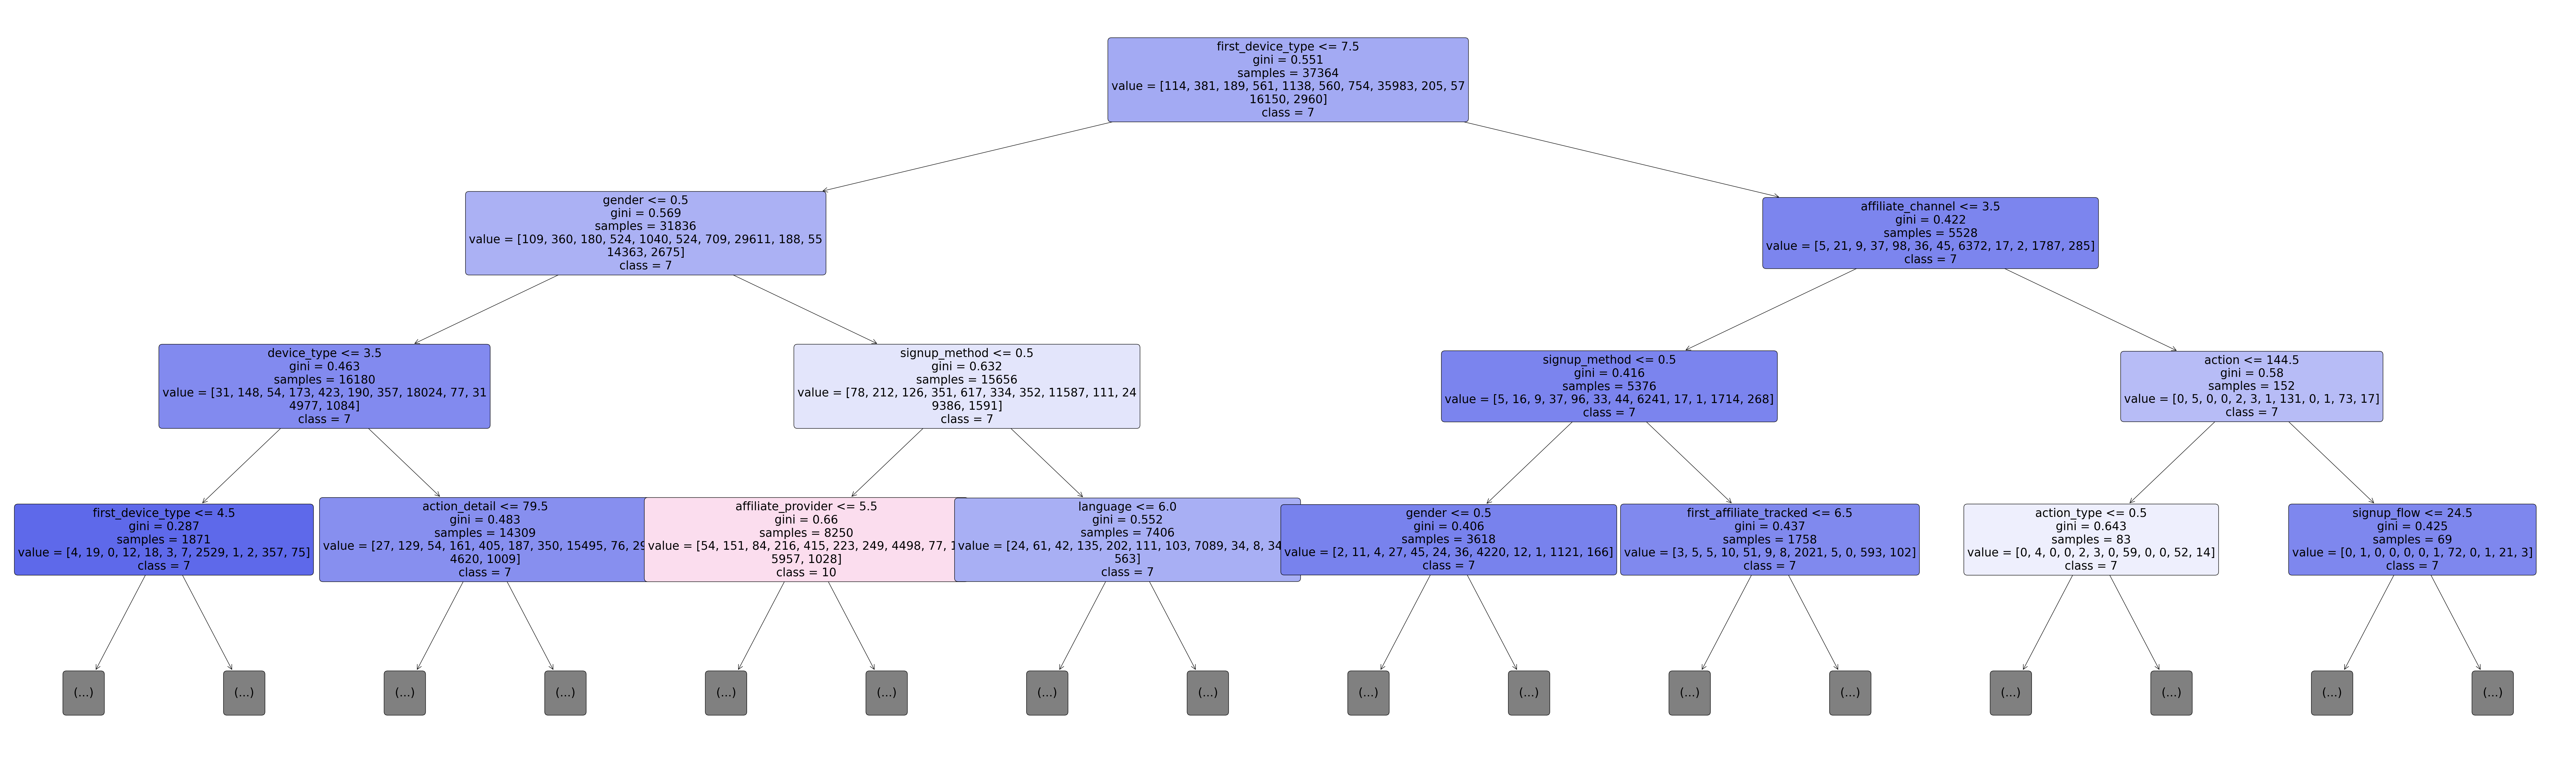

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Access a single tree from the forest (e.g., the first tree)
single_tree = rf_clf.estimators_[0]

# Convert class labels to strings
class_labels = [str(label) for label in rf_clf.classes_]

# Set the figure size and background color
plt.figure(figsize=(100, 30), facecolor='white')

# Plot the first 6 levels (nodes) of the decision tree
plot_tree(single_tree, feature_names=X_train.columns, class_names=class_labels, rounded=True, filled=True, fontsize=25, max_depth=3)

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you've already trained the RandomForestClassifier and obtained predictions
y_pred_train = rf_clf.predict(X_train)

# Calculate classification metrics for training predictions
accuracy = accuracy_score(y_train, y_pred_train)
precision_micro = precision_score(y_train, y_pred_train, average='weighted')
recall_micro = recall_score(y_train, y_pred_train, average='weighted')
f1_micro = f1_score(y_train, y_pred_train, average='weighted')



print("Accuracy:", accuracy)
print(" Precision:", precision_micro)
print(" Recall:", recall_micro)
print(" F1-score:", f1_micro)



Accuracy: 0.6551175235385762
 Precision: 0.6392016057644387
 Recall: 0.6551175235385762
 F1-score: 0.5962405841173238


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

y_pred = rf_clf.predict(X_test)
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        78
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00       151
           4       0.00      0.00      0.00       311
           5       0.00      0.00      0.00       144
           6       0.00      0.00      0.00       218
           7       0.68      0.91      0.77      8978
           8       0.00      0.00      0.00        48
           9       0.00      0.00      0.00        17
          10       0.49      0.34      0.40      4029
          11       0.00      0.00      0.00       716

    accuracy                           0.64     14763
   macro avg       0.10      0.10      0.10     14763
weighted avg       0.55      0.64      0.58     14763



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from collections import Counter
rf_clf = RandomForestClassifier(n_estimators=100)
sel = SelectFromModel(rf_clf)
sel.fit(X_train, y_train)
select_feat = X_train.columns[(sel.get_support())]
print("Number of selected features:", len(select_feat))

Number of selected features: 8


In [ ]:

select_feat

Index(['action', 'action_detail', 'gender', 'affiliate_channel',
       'first_affiliate_tracked', 'first_browser', 'account_created_month',
       'first_active_month'],
      dtype='object')

# XGBClassifier


In [ ]:
Input = mg.drop(['user_id','country_destination','first_active_day','age','account_created_day','first_active_year','secs_elapsed', 'date_first_booking'], axis=1)
Output = mg['country_destination']

In [ ]:
#Classifier
#from xgboost import XGBClassifier
#xgb = XGBClassifier(max_depth=6, learning_rate=0.3, n_estimators=25,
 #                   objective='multi:softprob', subsample=0.5, colsample_bytree=0.5, seed=0)
#xgb.fit(X, y)


In [ ]:
from xgboost import XGBClassifier

# Create and fit an XGBClassifier model
xgb_clf = XGBClassifier(max_depth=6, learning_rate=0.25, n_estimators=43,
                    objective='multi:softprob', subsample=0.6, colsample_bytree=0.6, seed=0)
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=43, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:

xgb_pred = xgb_clf.predict(X_test)


In [ ]:
y_pred_train = xgb_clf.predict(X_train)
# Calculate classification metrics for training predictions
accuracy = accuracy_score(y_train, y_pred_train)
precision_micro = precision_score(y_train, y_pred_train, average='weighted')
recall_micro = recall_score(y_train, y_pred_train, average='weighted')
f1_micro = f1_score(y_train, y_pred_train, average='weighted')



print("Accuracy:", accuracy)
print(" Precision:", precision_micro)
print(" Recall:", recall_micro)
print(" F1-score:", f1_micro)


Accuracy: 0.6596389622705412
 Precision: 0.6526409524074601
 Recall: 0.6596389622705412
 F1-score: 0.6054278958736179


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

y_pred = xgb_clf.predict(X_test)
classification_report = classification_report(y_test, y_pred)
print(classification_report)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        78
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00       151
           4       0.00      0.00      0.00       311
           5       0.00      0.00      0.00       144
           6       0.00      0.00      0.00       218
           7       0.69      0.89      0.78      8978
           8       0.00      0.00      0.00        48
           9       0.00      0.00      0.00        17
          10       0.50      0.39      0.44      4029
          11       0.00      0.00      0.00       716

    accuracy                           0.65     14763
   macro avg       0.10      0.11      0.10     14763
weighted avg       0.56      0.65      0.59     14763



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.feature_selection import SelectFromModel
from collections import Counter
rf_clf = XGBClassifier(n_estimators=100)
sel = SelectFromModel(rf_clf)
sel.fit(X_train, y_train)
select_feat = X_train.columns[(sel.get_support())]
print("Number of selected features:", len(select_feat))

Number of selected features: 4


In [ ]:
select_feat

Index(['action_detail', 'gender', 'signup_method', 'signup_flow'], dtype='object')

# LogisticRegression


In [ ]:
Input = merged_df.drop(['user_id','country_destination','first_active_day','age','account_created_day','first_active_year','date_first_booking','secs_elapsed'], axis=1)
Output = merged_df['country_destination']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))




Accuracy of logistic regression classifier on test set: 0.61


In [ ]:
from sklearn.metrics import classification_report
y_true = y_test

# Assuming you have the predicted labels (y_pred) and the true labels (y_true)
classification_report = classification_report(y_true, y_pred)

# Print the classification report
print(classification_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.00      0.00      0.00       122
           2       0.00      0.00      0.00        81
           3       0.00      0.00      0.00       224
           4       0.00      0.00      0.00       439
           5       0.00      0.00      0.00       216
           6       0.00      0.00      0.00       315
           7       0.61      1.00      0.76     13494
           8       0.00      0.00      0.00        72
           9       0.00      0.00      0.00        30
          10       0.00      0.00      0.00      6040
          11       0.00      0.00      0.00      1071

    accuracy                           0.61     22145
   macro avg       0.05      0.08      0.06     22145
weighted avg       0.37      0.61      0.46     22145



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#SMOTE

In [ ]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({7: 36063, 3: 36063, 10: 36063, 11: 36063, 4: 36063, 8: 36063, 2: 36063, 1: 36063, 5: 36063, 0: 36063, 6: 36063, 9: 36063})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_res, y_res)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report

y_pred = rf_clf.predict(X_test)
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.01      0.03      0.01        78
           2       0.01      0.02      0.01        50
           3       0.02      0.05      0.03       151
           4       0.03      0.06      0.04       311
           5       0.01      0.03      0.01       144
           6       0.01      0.03      0.02       218
           7       0.70      0.56      0.62      8978
           8       0.01      0.02      0.01        48
           9       0.00      0.00      0.00        17
          10       0.36      0.33      0.34      4029
          11       0.06      0.11      0.08       716

    accuracy                           0.44     14763
   macro avg       0.10      0.10      0.10     14763
weighted avg       0.53      0.44      0.48     14763



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_train = rf_clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train)
precision_micro = precision_score(y_train, y_pred_train, average='weighted')
recall_micro = recall_score(y_train, y_pred_train, average='weighted')
f1_micro = f1_score(y_train, y_pred_train, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision_micro)
print("Recall:", recall_micro)
print("F1-score:", f1_micro)

Accuracy: 0.717706428232744
Precision: 0.800135590600653
Recall: 0.717706428232744
F1-score: 0.7454691588548256


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from collections import Counter
rf_clf = RandomForestClassifier(n_estimators=100)
sel = SelectFromModel(rf_clf)
sel.fit(X_train, y_train)
select_feat = X_train.columns[(sel.get_support())]
print("Number of selected features:", len(select_feat))

Number of selected features: 8


In [ ]:
select_feat

Index(['action', 'action_detail', 'gender', 'affiliate_channel',
       'first_affiliate_tracked', 'first_browser', 'account_created_month',
       'first_active_month'],
      dtype='object')

<ipython-input-47-ead9cdf612a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = mg.corr()


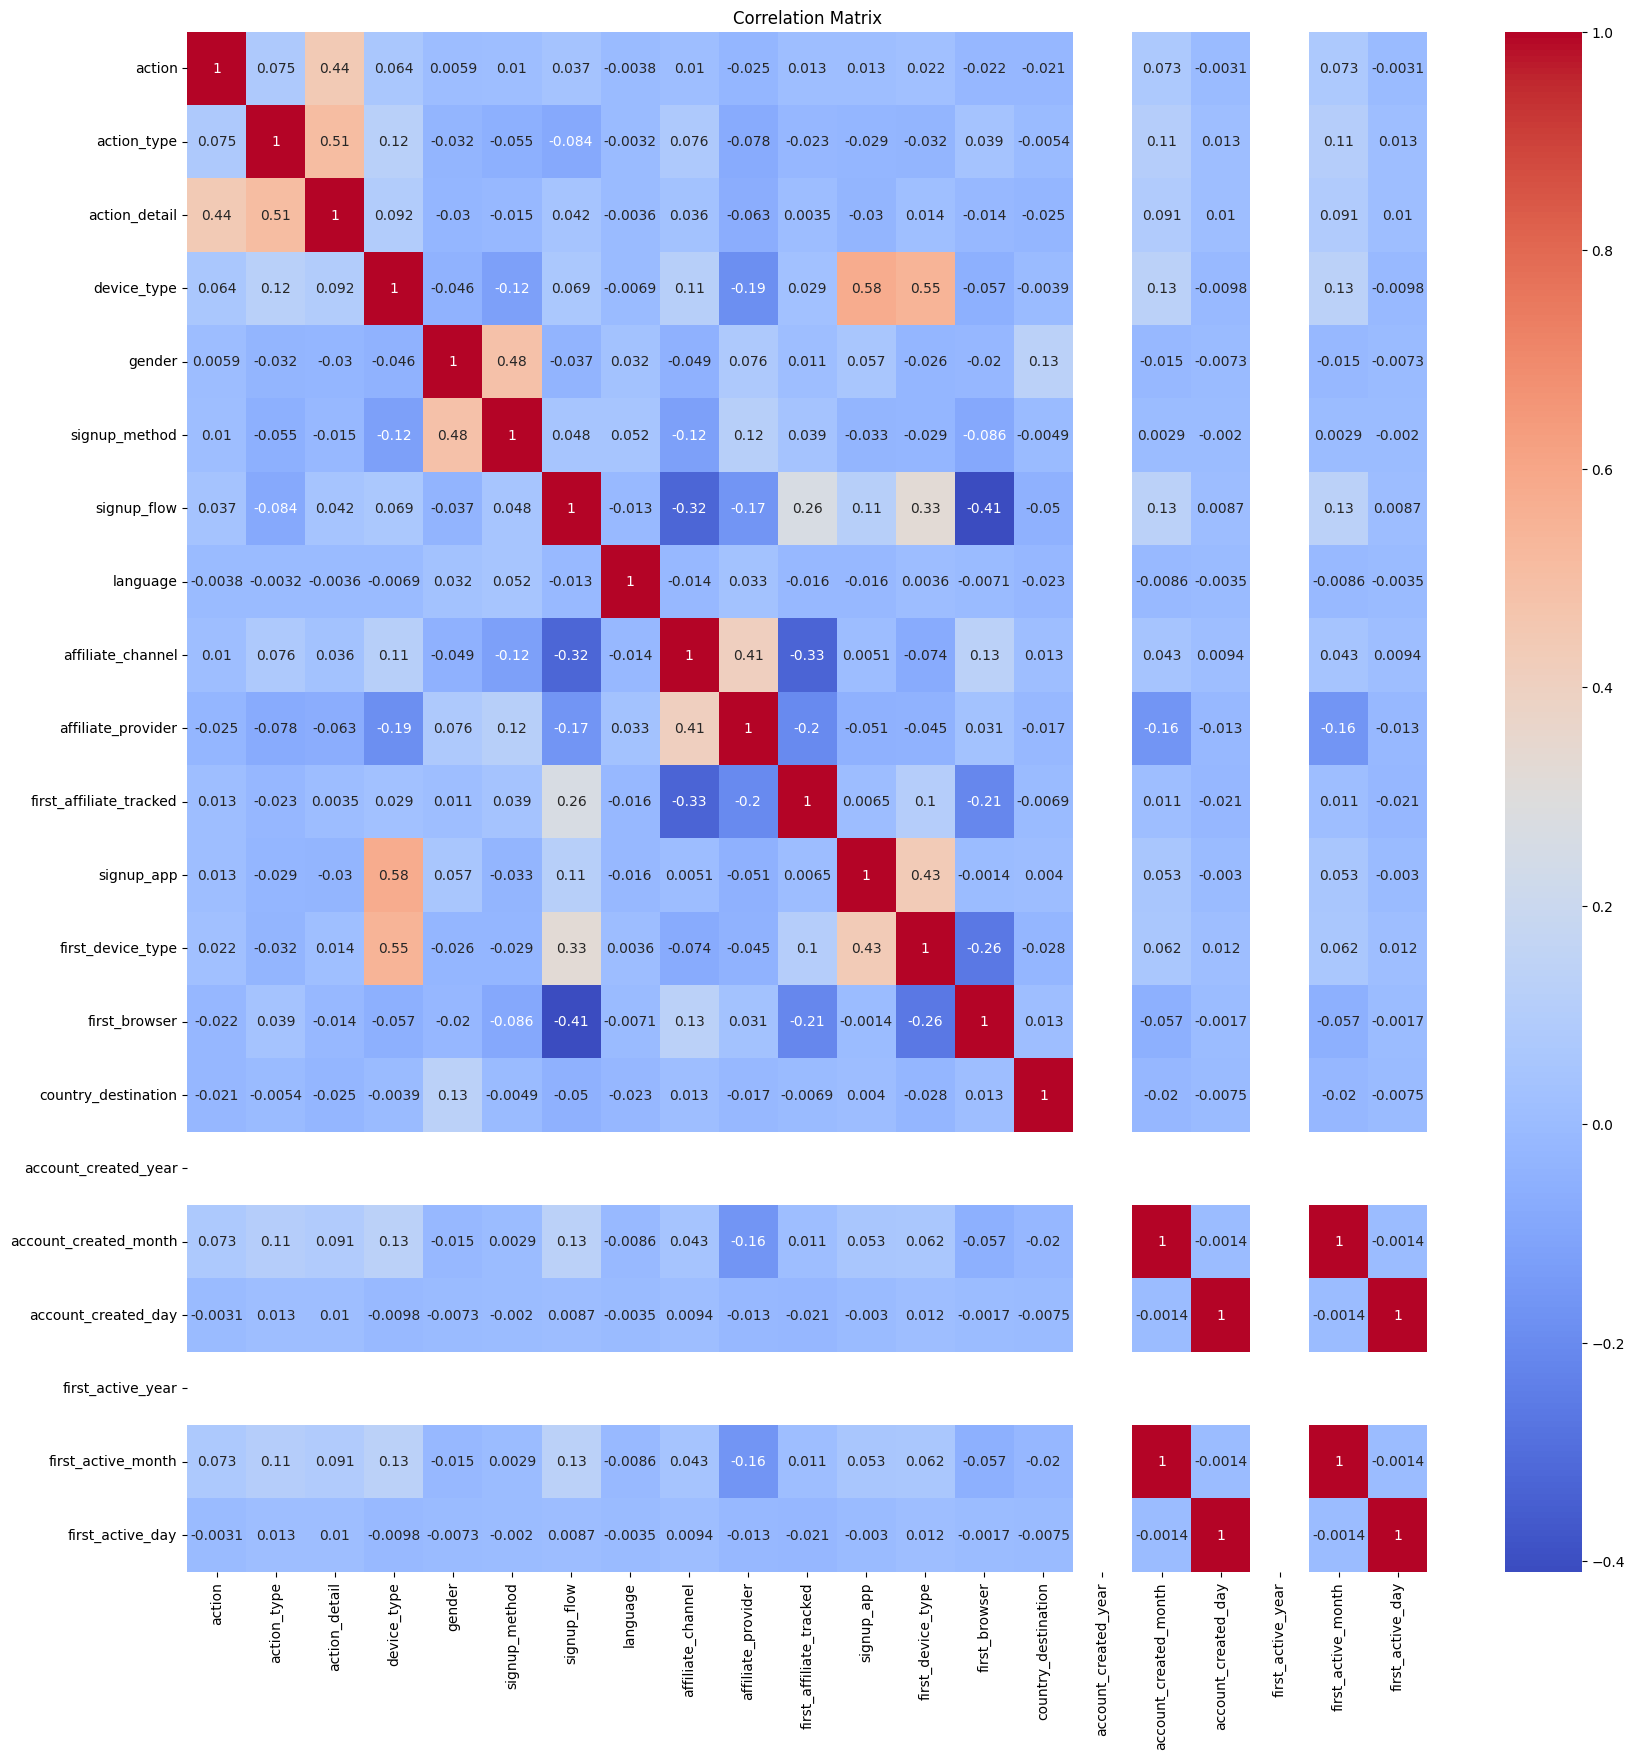

In [ ]:
correlation_matrix = mg.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

# IMBLEARN RandomForestClassifier

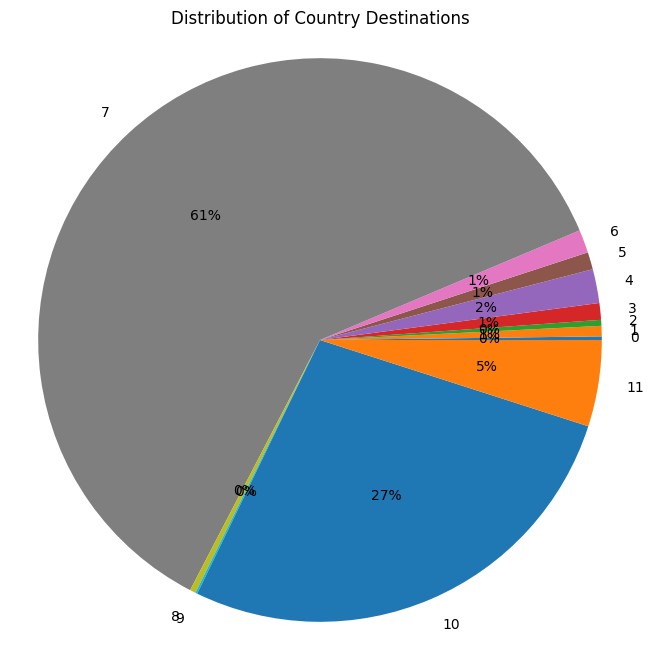

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame
grouped_df = mg.groupby(['country_destination']).size().reset_index(name='count')

# Create a larger figure for the pie chart
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(grouped_df['count'], labels=grouped_df['country_destination'], autopct='%1.0f%%')
plt.title('Distribution of Country Destinations')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

In [ ]:
Input = mg.drop(['user_id','country_destination','first_active_day','age','account_created_day','first_active_year','date_first_booking','secs_elapsed'], axis=1)
Output = mg['country_destination']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.20,random_state = 0)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Get the number of samples in the 'NDF' class
ndf_count = (Output == 7).sum()

# Define the desired number of samples for the 'NDF' class
desired_number_of_samples = ndf_count

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy={7: desired_number_of_samples}, random_state=0)

# Perform undersampling on the input and output data
X_resampled, y_resampled = rus.fit_resample(Input, Output)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_resampled, y_resampled)

RandomForestClassifier()

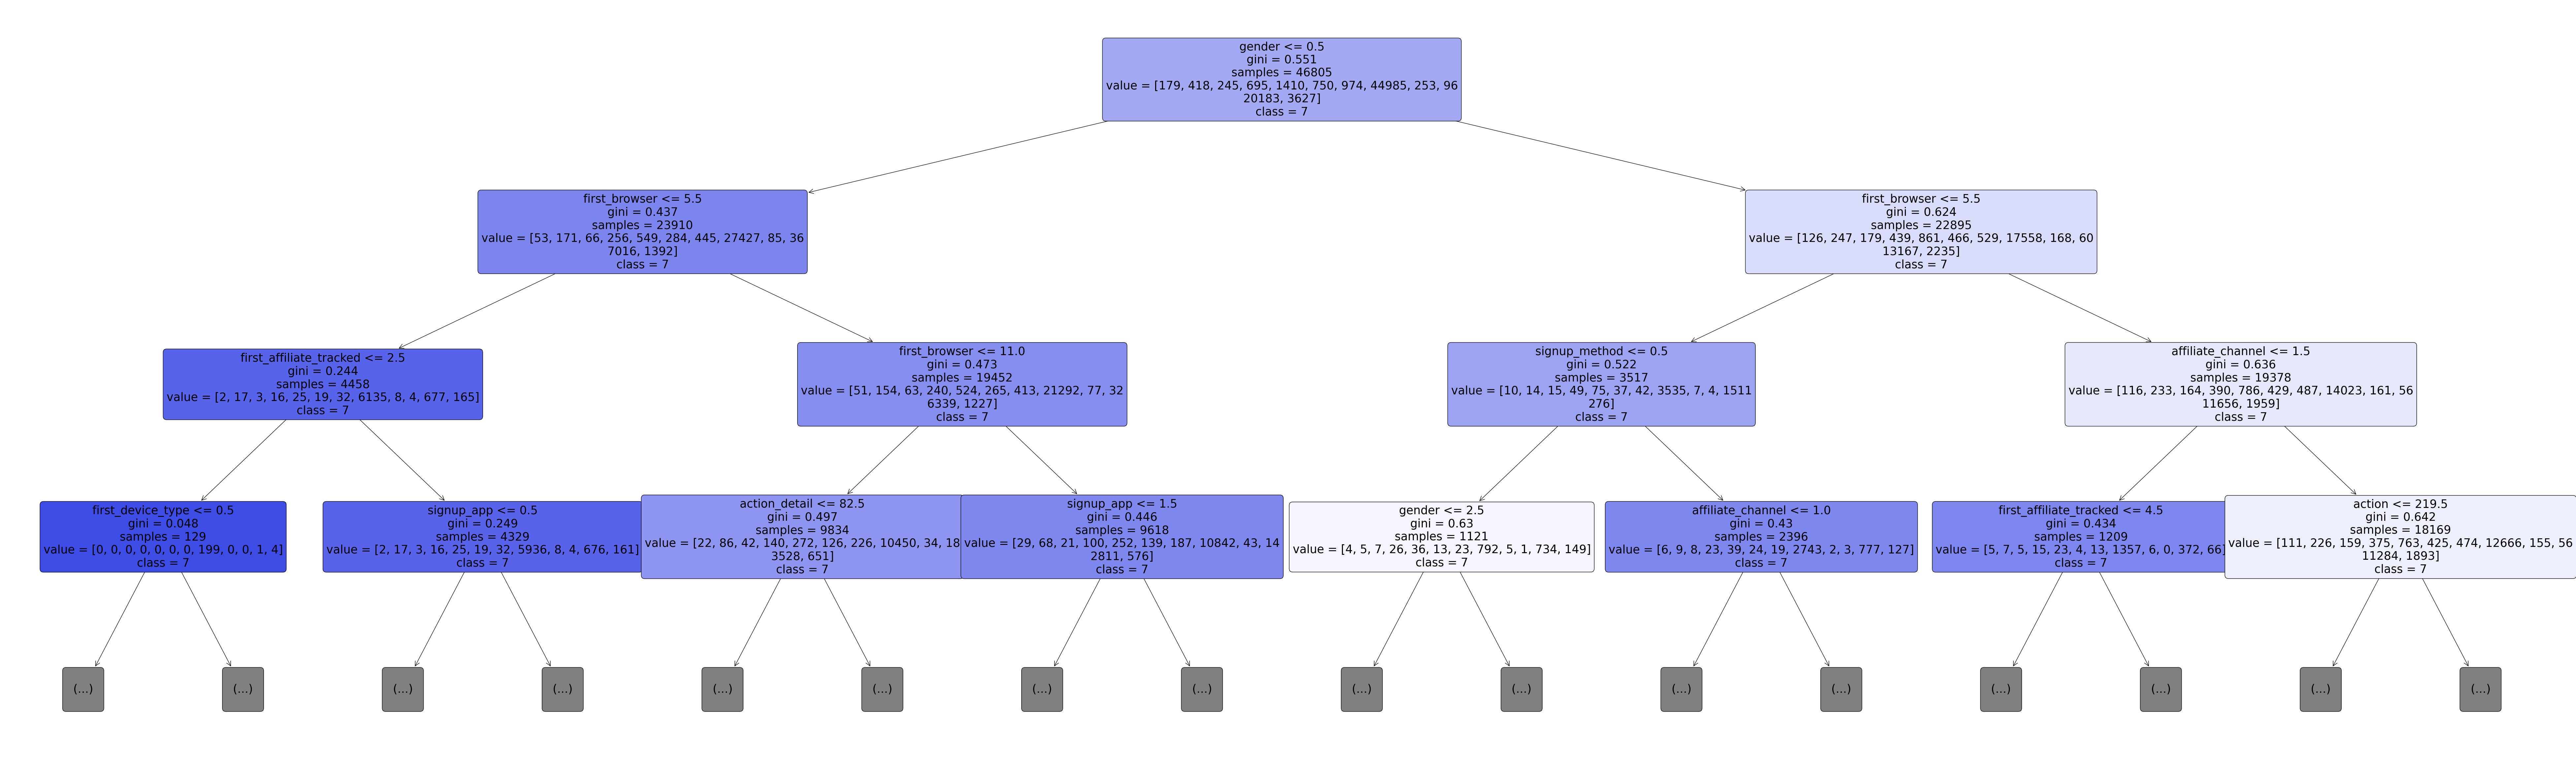

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Access a single tree from the forest (e.g., the first tree)
single_tree = rf_clf.estimators_[0]

# Convert class labels to strings
class_labels = [str(label) for label in rf_clf.classes_]

# Set the figure size and background color
plt.figure(figsize=(100, 30), facecolor='white')

# Plot the first 6 levels (nodes) of the decision tree
plot_tree(single_tree, feature_names=X_train.columns, class_names=class_labels, rounded=True, filled=True, fontsize=25, max_depth=3)

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = rf_clf.predict(X_test)
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.77      0.43      0.56        23
           1       0.91      0.55      0.69        78
           2       0.89      0.66      0.76        50
           3       0.81      0.44      0.57       151
           4       0.89      0.47      0.61       311
           5       0.88      0.46      0.60       144
           6       0.84      0.47      0.60       218
           7       0.83      0.95      0.89      8978
           8       1.00      0.46      0.63        48
           9       1.00      0.47      0.64        17
          10       0.82      0.70      0.75      4029
          11       0.85      0.50      0.63       716

    accuracy                           0.83     14763
   macro avg       0.88      0.55      0.66     14763
weighted avg       0.83      0.83      0.82     14763



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_train = rf_clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train)
precision_micro = precision_score(y_train, y_pred_train, average='weighted')
recall_micro = recall_score(y_train, y_pred_train, average='weighted')
f1_micro = f1_score(y_train, y_pred_train, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision_micro)
print("Recall:", recall_micro)
print("F1-score:", f1_micro)

Accuracy: 0.8285748154169207
Precision: 0.829488129286581
Recall: 0.8285748154169207
F1-score: 0.819243914254544


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from collections import Counter
rf_clf = RandomForestClassifier(n_estimators=100)
sel = SelectFromModel(rf_clf)
sel.fit(X_train, y_train)
select_feat = X_train.columns[(sel.get_support())]
print("Number of selected features:", len(select_feat))

Number of selected features: 7


In [ ]:
select_feat

Index(['action', 'action_detail', 'gender', 'first_affiliate_tracked',
       'first_browser', 'account_created_month', 'first_active_month'],
      dtype='object')

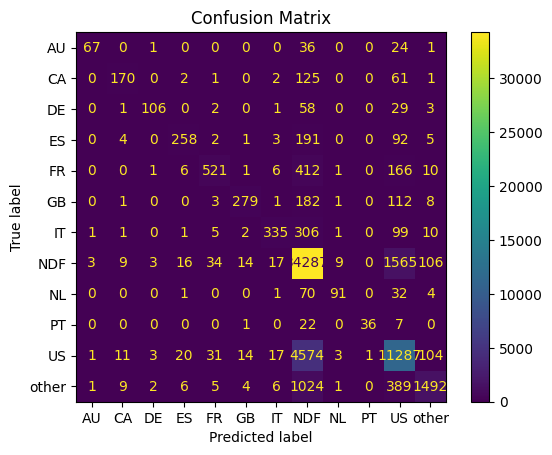

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix, display_labels=label_encoder.classes_)
cm_display.plot(cmap='viridis', values_format='d')  # You can customize the colormap and format
plt.title("Confusion Matrix")
plt.show()


<ipython-input-58-ead9cdf612a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = mg.corr()


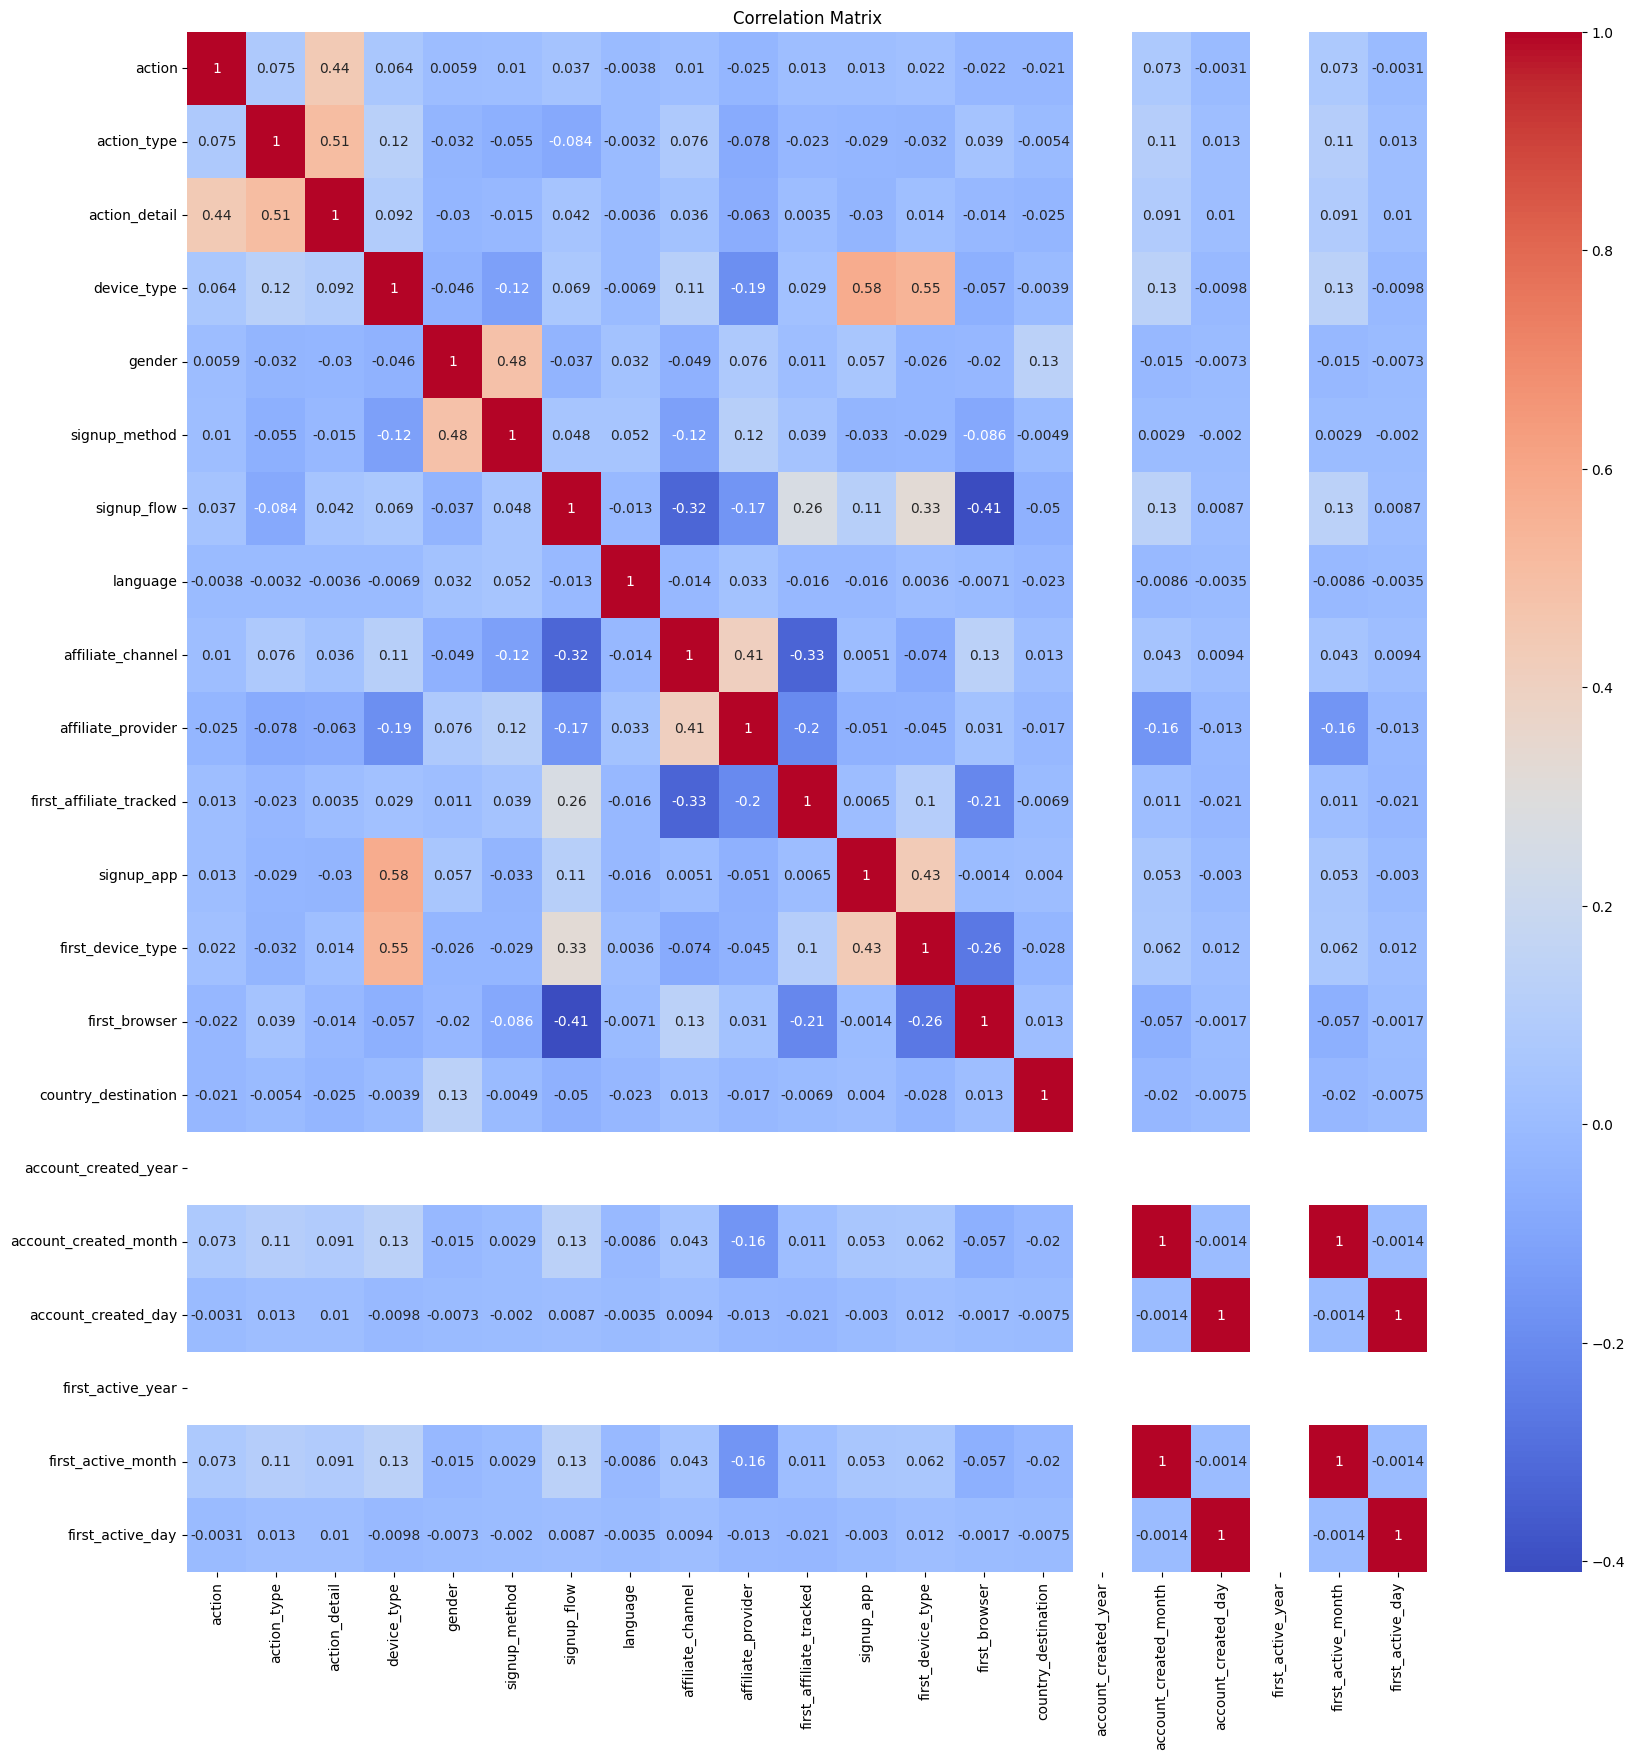

In [ ]:
correlation_matrix = mg.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

# IMBLEARN LogisticRegression


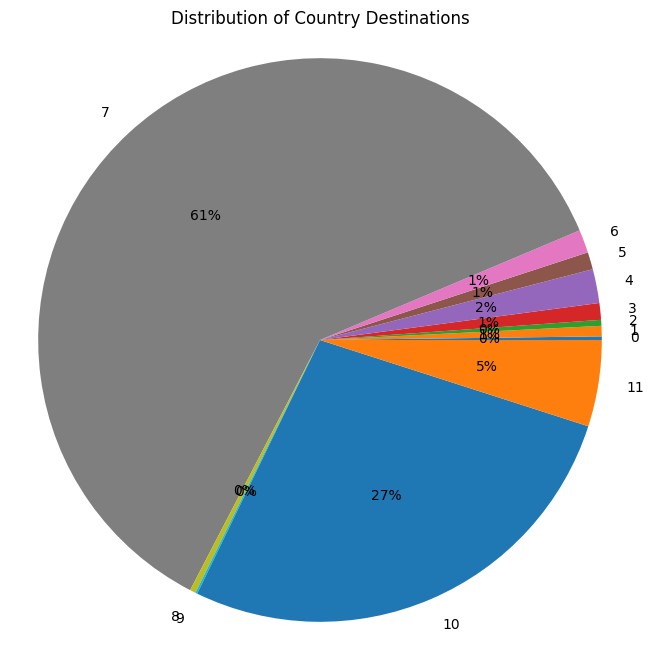

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame
grouped_df = merged_df.groupby(['country_destination']).size().reset_index(name='count')

# Create a larger figure for the pie chart
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(grouped_df['count'], labels=grouped_df['country_destination'], autopct='%1.0f%%')
plt.title('Distribution of Country Destinations')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

In [ ]:
Input = merged_df.drop(['user_id','country_destination','first_active_day','age','account_created_day','first_active_year','date_first_booking','secs_elapsed'], axis=1)
Output = merged_df['country_destination']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.20,random_state = 0)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression object
logreg = LogisticRegression()

# Fit the classifier on the under-sampled training data
logreg.fit(X_resampled, y_resampled)

# Use the classifier to make predictions on the test data
y_pred = logreg.predict(X_test)

# Generate a classification report for the predicted labels and the true labels (`y_test`):
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred)
print(classification_report)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        78
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00       151
           4       0.00      0.00      0.00       311
           5       0.00      0.00      0.00       144
           6       0.00      0.00      0.00       218
           7       0.61      1.00      0.76      8978
           8       0.00      0.00      0.00        48
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00      4029
          11       0.00      0.00      0.00       716

    accuracy                           0.61     14763
   macro avg       0.05      0.08      0.06     14763
weighted avg       0.37      0.61      0.46     14763



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))




Accuracy of logistic regression classifier on test set: 0.61
